# ex2.1 jack's car rental solving

## See p. 81 (section 4.3, example 4.2) in Sutton's Reinforcement learning: An introduction

Goal:

- implementing value iteration in dynamic programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## copy the code from ex2.0 here

Note: numba's jit could compile python's code to near native performance. If you can use it without problems, good for you, if not, just remove the line `@jit(nopython=True)`.

In [2]:
import numpy as np
from scipy.stats import poisson
from numba import jit

N_CARS = 20

# renting and returning propabilities
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 2)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)

@jit(nopython=True)
def step_rent(n_car, p):
    # code here ...
    # ...
    pp = np.zeros(p.shape[0])
    fac = []
    for i in range(N_CARS + 1):
        if i <= n_car:
            pp[n_car - i] = p[i]
            fac.append(i)
        else:
            pp[0] += p[i]
            fac.append(n_car)
    r = 10 * np.sum(p * np.array(fac))
    return pp, r

@jit(nopython=True)
def step_return(p_car, p):
    # code here ...
    # ...
    pp = np.convolve(p_car, p)
    # 21 to 40
    for i in range(N_CARS + 1, 2*N_CARS + 1):
        pp[20] += pp[i]
    pp = pp[:21]
    return pp


def step_rent_return(n_car, p_rent, p_return):
    p, r = step_rent(n_car, p_rent)
    p = step_return(p, p_return)
    return p, r

def step_env(s, a):
    """step a on state s, returning the next state distribution and the expected reward"""
    # s = (N_CARS_IN_A, N_CARS_IN_B)
    # move cars
    # code here ...
    # renting and returning
    # code here ...
    while(a>N_CARS):
        a-=1
    car_a = s[0]-a
    car_b = s[1]+a
    if(car_b>N_CARS): car_b = N_CARS
    p_a,r_a = step_rent_return(car_a, P_RENT_A, P_RETURN_A)
    p_b,r_b = step_rent_return(car_b, P_RENT_B, P_RETURN_B)
    
    p = []
    for i in range(N_CARS+1):
        p.append([])
        for j in range(N_CARS+1):
            p[i].append(p_a[i]*p_b[j])
    r = r_a+r_b
    r -= 2.0 * abs(a)
    # p is the "joint" probability over cars at first and second location
    # p has the shape of [N_CARS+1, N_CARS+1] where the dim=0 is the first location, dim=1 is the second location
    # r is the expected reward
    return p, r

# value iteration

implement the value iteration to solve this Jack's car rental problem.

In [3]:
# def value_itr(v, thresh=1e-4):
#     """implement the value iteration algorithm"""
#     # v = value table, has a shape of [N_CARS+1, N_CARS+1]
#     # make change to the v in-place
#     # code here ...
#     while True:
#         old_v = v.copy()
#         diff = 0
#         for i in range (N_CARS+1):
#             for j in range (N_CARS+1):
#                 max_r = -1000
#                 for k in range(-5,6):
#                         s = 0
#                         p , r = step_env((i,j),k)
#                         s = 0
#                         for l in range(N_CARS+1):
#                             for m in range(N_CARS+1):
#                                 s += p[l][m]*(r+0.9*v[l,m])
#                         if(s>max_r): max_r=s
#                 #print("j+idx = ",j+idx)
#                 v[i, j] = max_r
#                 diff = max(diff,np.abs(old_v[i][j]-v[i][j]))
#         print(diff)
#         if(diff<thresh):
#             break
#     return v
def value_itr(v, thresh=1e-4):
    """implement the value iteration algorithm"""
    # v = value table, has a shape of [N_CARS+1, N_CARS+1]
    # make change to the v in-place
    # code here ...
    while True:
        delta = 0
        for i in range(N_CARS + 1):
            for j in range(N_CARS + 1):
                s = (i, j)
                old_v = v[i, j]
                lst = []
                for a in range(-5, 6):
                    p, r = step_env(s, a)
                    sm = 0
                    for k in range(N_CARS + 1):
                        for m in range(N_CARS + 1):
                            sm += p[k][m] * (r + 0.9*v[k, m])
                    lst.append(sm)
                v[i, j] = max(lst)
                delta = max(delta, abs(old_v - v[i, j]))
        #print(delta)
        if delta < thresh:
            break
    return v

## verify the solution value

259.6111159356901
119.59175544470838
87.9998314361253
66.25067378725865
49.98168720693218
38.54430496792065
31.322218911433055
25.754216331358975
21.129848745743914
17.315933263434715
14.181300754451854
11.611485939399131
9.50670389698854
7.7829666015135786
6.371718320942421
5.216539012735666
4.270838762812616
3.4966351359740884
2.862857957369613
2.344023862684935
1.9192655103931315
1.5715078284837887
1.286780746855925
1.0536560681538276
0.8627822303638482
0.7064991211799452
0.5785334915417479
0.47375324186367607
0.38795638532906196
0.31770224876169095
0.26017359228495707
0.21306401451414558
0.17448558598204045
0.14289287372326953
0.1170206606510078
0.09583301887403195
0.07848168122313837
0.06427200489531515
0.05263513451978952
0.04310522179758891
0.035300772922198576
0.02890937290413831
0.023675175817743366
0.019388660740389696
0.015878243144470616
0.01300340561857638
0.010649072614171473
0.008721003852770082
0.007142021885044869
0.005848922710470106
0.004789945775769411
0.00392270204

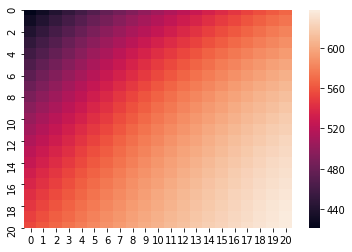

In [4]:
v = np.zeros((N_CARS+1, N_CARS+1))
v = value_itr(v)
print(v.min(), v.max())
sns.heatmap(v)

Expected result:

421.4136554821914 636.9894057704319

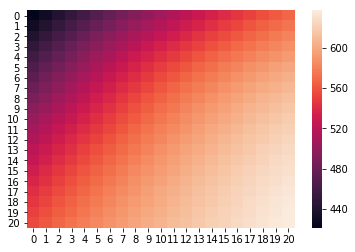

# show the greedy policy

In [7]:
def greedy(v):
    """return the greedy policy wrt. a given value table"""
    pi = np.zeros((N_CARS+1, N_CARS+1))
    for i in range(N_CARS + 1):
        for j in range(N_CARS + 1):
            s = (i, j)
            old_v = v[i, j]
            lst = []
            for a in range(-5, 6):
                p, r = step_env(s, a)
                sm = 0
                for k in range(N_CARS + 1):
                    for m in range(N_CARS + 1):
                        sm += p[k][m] * (r + 0.9*v[k, m])
                lst.append((sm, a))
            pi[i, j] = max(lst)[1]
    return pi

## verify the greedy solution policy

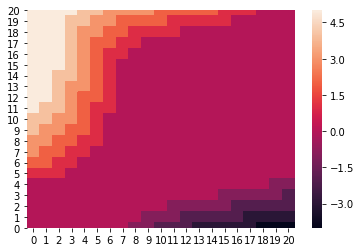

In [8]:
pi = greedy(v)
sns.heatmap(pi[::-1], xticklabels=range(N_CARS+1), yticklabels=list(reversed(range(N_CARS+1))))

Expected result:

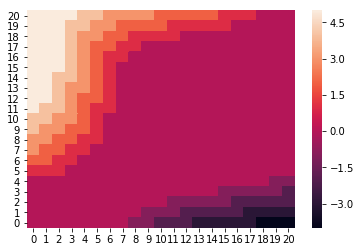

# If we change the renting and returning probabilities like the following:

In [9]:
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 0)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 4)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 0)

## Q: what is an expected behavior?

Describe in this box....
reward ที่ได้จะมีค่าน้อยลง เพราะการยืมมักสงที่ A แต่ขัดแย้งกับการคืนที่มันสงที่ B